In [10]:
# Set up simple CNN for MNIST hand-written digits image recognition
#import the necessary libraries 
%matplotlib inline

import tensorflow as tf 
import matplotlib.pyplot as plt

In [11]:
mnist = tf.keras.datasets.mnist

7


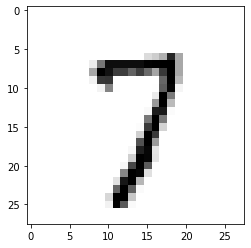

In [12]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

image_index = 258 # You may select anything up to 60,000
print(y_train[image_index]) # The label 
plt.imshow(x_train[image_index], cmap='Greys')

In [13]:
#check the shape of the imput elements

x_train.shape

(60000, 28, 28)

In [14]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [15]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [16]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [17]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:1569 sparse_categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\backend.py:4941 sparse_categorical_crossentropy
        labels=target, logits=output)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_ops.py:4241 sparse_softmax_cross_entropy_with_logits_v2
        labels=labels, logits=logits, name=name)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_ops.py:4156 sparse_softmax_cross_entropy_with_logits
        logits.get_shape()))

    ValueError: Shape mismatch: The shape of labels (received (32,)) should equal the shape of logits except for the last dimension (received (21632, 10)).


In [1]:
import pandas as pd 
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history10.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

NameError: name 'history' is not defined

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
image_index = 7850
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())